### Análisis Exploratorio Titanic

#### 1. Cargar Librerías

In [65]:
##Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Funciones 

In [66]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

##Función para identificación de variables categóricas
def idenCat(df):
    categoricas = [i for i in df.columns if df[i].dtype=='O']
    print('Hay {} Variables Categoricas \n'. format(len(categoricas)))
    print('Las Variables Categoricas son: \n', categoricas)

def histoplot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

#### Análisis Inicial

In [67]:
data = importDatos('./Datasets/','Titanic','.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
datos_NAN(data)

Dimesiones: 891 filas, 12 columnas
Total de Valores NAN: 866
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88        177
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         147        687
                                E

In [69]:
### Función para determinar datos categóricos
categoricas = [i for i in data.columns if data[i].dtype=='O']

print('Hay {} Variables Categoricas \n'. format(len(categoricas)))

print('Las Variables Categoricas son: \n', categoricas)

Hay 5 Variables Categoricas 

Las Variables Categoricas son: 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [70]:
idenCat(data)

Hay 5 Variables Categoricas 

Las Variables Categoricas son: 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [71]:
numericas = [i for i in data.columns if data[i].dtype!='O']

print('Hay {} Variables numericas \n'. format(len(numericas)))

print('Las Variables numericas son: \n', numericas)

Hay 7 Variables numericas 

Las Variables numericas son: 
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [72]:
##Distribución de frecuencias
for i in categoricas:
    print(round(data[i].value_counts()/np.float64(len(data)),3)*100)

Braund, Mr. Owen Harris                     0.1
Boulos, Mr. Hanna                           0.1
Frolicher-Stehli, Mr. Maxmillian            0.1
Gilinski, Mr. Eliezer                       0.1
Murdlin, Mr. Joseph                         0.1
                                           ... 
Kelly, Miss. Anna Katherine "Annie Kate"    0.1
McCoy, Mr. Bernard                          0.1
Johnson, Mr. William Cahoone Jr             0.1
Keane, Miss. Nora A                         0.1
Dooley, Mr. Patrick                         0.1
Name: Name, Length: 891, dtype: float64
male      64.8
female    35.2
Name: Sex, dtype: float64
347082      0.8
CA. 2343    0.8
1601        0.8
3101295     0.7
CA 2144     0.7
           ... 
9234        0.1
19988       0.1
2693        0.1
PC 17612    0.1
370376      0.1
Name: Ticket, Length: 681, dtype: float64
B96 B98        0.4
G6             0.4
C23 C25 C27    0.4
C22 C26        0.3
F33            0.3
              ... 
E34            0.1
C7             0.1
C54   

In [73]:
for i in numericas:
    print(round(data[i].value_counts()/np.float64(len(data)),3)*100)

1      0.1
599    0.1
588    0.1
589    0.1
590    0.1
      ... 
301    0.1
302    0.1
303    0.1
304    0.1
891    0.1
Name: PassengerId, Length: 891, dtype: float64
0    61.6
1    38.4
Name: Survived, dtype: float64
3    55.1
1    24.2
2    20.7
Name: Pclass, dtype: float64
24.00    3.4
22.00    3.0
18.00    2.9
19.00    2.8
28.00    2.8
        ... 
36.50    0.1
55.50    0.1
0.92     0.1
23.50    0.1
74.00    0.1
Name: Age, Length: 88, dtype: float64
0    68.2
1    23.5
2     3.1
4     2.0
3     1.8
8     0.8
5     0.6
Name: SibSp, dtype: float64
0    76.1
1    13.2
2     9.0
5     0.6
3     0.6
4     0.4
6     0.1
Name: Parch, dtype: float64
8.0500     4.8
13.0000    4.7
7.8958     4.3
7.7500     3.8
26.0000    3.5
          ... 
35.0000    0.1
28.5000    0.1
6.2375     0.1
14.0000    0.1
10.5167    0.1
Name: Fare, Length: 248, dtype: float64


#### Limpieza

In [74]:
data['Name']

data['Inicial']=0

for i in data:
    data['Inicial'] = data.Name.str.extract('([A-Za-z]+)\.')

data.Inicial

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Inicial, Length: 891, dtype: object

In [75]:
##Cruzar variables tablas.
pd.crosstab(data.Inicial, data.Sex).T.style.background_gradient(cmap='summer_r')

Inicial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


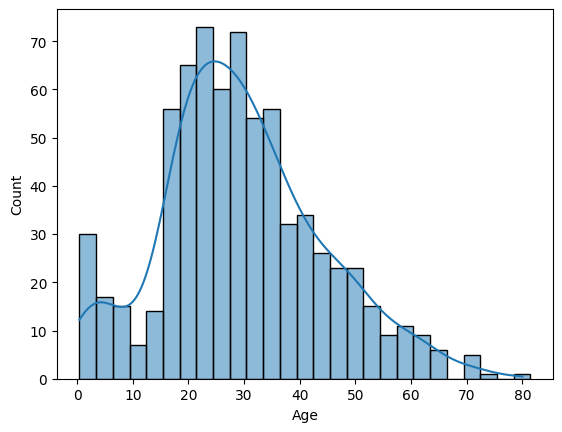

In [76]:
##Histograma de edades 
histoplot(data, 'Age', 3)

In [77]:
data['Inicial'].replace(['Mlle','Mme', 'Ms','Dr','Major', 'Lady','Countess','Jonkheer'
                         , 'Col','Rev','Capt','Sir','Don','Master'], ['Miss','Miss','Miss','Mr','Mr','Mrs'
                                                             ,'Mrs','Other','Other','Other','Mr','Mr','Mr','Child'],
                           inplace=True)

In [78]:
data.Inicial.value_counts()

Mr       529
Miss     186
Mrs      127
Child     40
Other      9
Name: Inicial, dtype: int64

In [79]:
round(data.groupby('Inicial')['Age'].median(),0)

Inicial
Child     4.0
Miss     22.0
Mr       30.0
Mrs      35.0
Other    51.0
Name: Age, dtype: float64

In [81]:
###No es util para el ejercicio
round(data.groupby('Sex')['Age'].mean(),0)

Sex
female    28.0
male      31.0
Name: Age, dtype: float64

In [82]:
##Reemplazar datos NAN en Age con base en la tipología
data.loc[(data.Age.isnull())&(data.Inicial=='Mr'), 'Age']=30
data.loc[(data.Age.isnull())&(data.Inicial=='Mrs'), 'Age']=35
data.loc[(data.Age.isnull())&(data.Inicial=='Child'), 'Age']=4
data.loc[(data.Age.isnull())&(data.Inicial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Inicial=='Other'), 'Age']=51

datos_NAN(data)

Dimesiones: 891 filas, 13 columnas
Total de Valores NAN: 689
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                             PassengerId      int64         891          0
                                Survived      int64           2          0
                                  Pclass      int64           3          0
                                    Name     object         891          0
                                     Sex     object           2          0
                                     Age    float64          88          0
                                   SibSp      int64           7          0
                                   Parch      int64           7          0
                                  Ticket     object         681          0
                                    Fare    float64         248          0
                                   Cabin     object         147        687
                                E